In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# **Cargar dataset**

In [ ]:
#No optimizado
dataset_path = os.path.join(os.getcwd(), 'diabetes.csv')
df = pd.read_csv(dataset_path)
df = pd.get_dummies(df,prefix=['class'])

In [10]:
dataset_path = os.path.join(os.getcwd(), 'diabetes.csv')
df = pd.read_csv(dataset_path, dtype={
    'preg': np.int8,
    'plas': np.int16,
    'pres': np.int8,
    'skin': np.int8,
    'insu': np.int16,
    'mass': np.float16,
    'pedi': np.float16,
    'age': np.int8
})
df = pd.get_dummies(df,prefix=['class'])

# **Información relevante del dataset**

preg: Number of times pregnant  
plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
pres: Diastolic blood pressure (mm Hg)  
skin: Triceps skin fold thickness (mm)  
insu: 2-Hour serum insulin (mu U/ml)  
mass: Body mass index (weight in kg/(height in m)^2)  
pedi: Diabetes pedigree function  
age: Age (years)  
class: Class variable (0 or 1)  

In [11]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class_tested_negative,class_tested_positive
0,6,148,72,35,0,33.593750,0.626953,50,0,1
1,1,85,66,29,0,26.593750,0.351074,31,1,0
2,8,183,64,0,0,23.296875,0.671875,32,0,1
3,1,89,66,23,94,28.093750,0.166992,21,1,0
4,0,137,40,35,168,43.093750,2.287109,33,0,1


In [4]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class_tested_negative,class_tested_positive
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,32.000000,0.471924,33.240885,0.651042,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.882812,0.331299,11.760232,0.476951,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078003,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.296875,0.243774,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372559,29.000000,1.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.593750,0.626221,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,81.000000,1.000000,1.000000


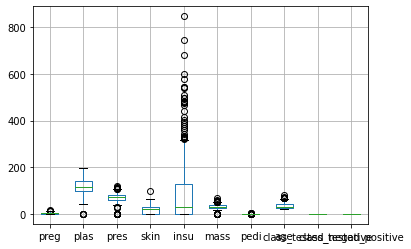

In [5]:
df.boxplot()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   preg                   768 non-null    int8   
 1   plas                   768 non-null    int16  
 2   pres                   768 non-null    int8   
 3   skin                   768 non-null    int8   
 4   insu                   768 non-null    int16  
 5   mass                   768 non-null    float16
 6   pedi                   768 non-null    float16
 7   age                    768 non-null    int8   
 8   class_tested_negative  768 non-null    uint8  
 9   class_tested_positive  768 non-null    uint8  
dtypes: float16(2), int16(2), int8(4), uint8(2)
memory usage: 10.6 KB


# **Generar datos para entrenar y validar**

In [12]:
X = df.loc[:, ~df.columns.isin(['class_tested_negative', 'class_tested_positive'])]
y = df[['class_tested_negative', 'class_tested_positive']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Definir el modelo**

In [13]:
model = Sequential()

model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(2, kernel_initializer='uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 18        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


# **Entrenar modelo**

In [14]:
history = model.fit(X_train, y_train, epochs=150, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/150
31/31 [==============================] - 0s 11ms/step - loss: 0.6859 - accuracy: 0.6564 - val_loss: 0.6815 - val_accuracy: 0.6234
Epoch 2/150
31/31 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.6580 - val_loss: 0.6745 - val_accuracy: 0.6234
Epoch 3/150
31/31 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6580 - val_loss: 0.6786 - val_accuracy: 0.6234
Epoch 4/150
31/31 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6580 - val_loss: 0.6741 - val_accuracy: 0.6234
Epoch 5/150
31/31 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.6824 - val_loss: 0.6714 - val_accuracy: 0.5649
Epoch 6/150
31/31 [==============================] - 0s 5ms/step - loss: 0.6185 - accuracy: 0.6694 - val_loss: 0.6721 - val_accuracy: 0.5779
Epoch 7/150
31/31 [==============================] - 0s 6ms/step - loss: 0.6018 - accuracy: 0.6954 - val_loss: 0.6612 - val_accuracy: 0.6104
Epoch 8/150


# **Probar modelo**

In [15]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

5/5 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6818
accuracy: 68.18%


# **Prediciendo un caso**

In [16]:
sample = np.reshape(np.array([1, 85, 66, 29, 0, 26.5937, 0.3510, 31]), (1,8))
prediction = model.predict(sample)[0]
list(zip(['prob_negative', 'prob_positive'], prediction))

[('prob_negative', 0.9332234), ('prob_positive', 0.066896185)]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


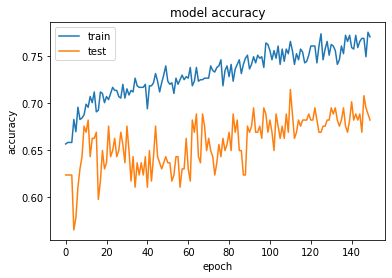

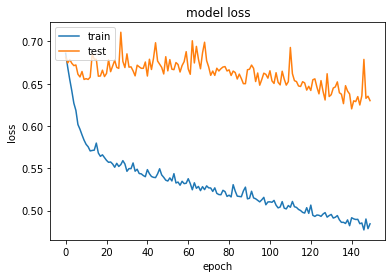

In [17]:
print(history.history.keys())

# Plot del Acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot del Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()